# `breaks` Parameter of the `geom_histogram()`

In [1]:
import pandas as pd

from lets_plot import *


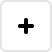
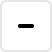
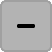
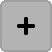
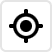
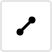
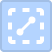
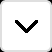
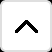
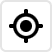
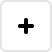
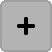
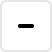
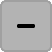
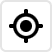
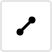
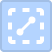
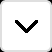
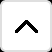
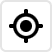

In [2]:
LetsPlot.setup_html()

## Demonstration

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Default Plot

In [4]:
gggrid([
    ggplot(df) + geom_histogram(aes(x="hwy"), color="black", fill="white") + ggtitle("Default binwidth (undefined)"),
    ggplot(df) + geom_histogram(aes(x="hwy"), binwidth=5, color="black", fill="white") + ggtitle("binwidth=5"),
])

### Defined `breaks`

In [5]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 23, 32, 36, 37], color="black", fill="white")

### `binwidth` vs. `breaks`

When both parameters are specified — `binwidth` and `breaks` — `breaks` prevails at the statistical level, overwriting `binwidth`, but the geometry is drawn using the user-specified `binwidth`.

This seems strange, but the combination of parameters is conflicting, so there is no 100% correct interpretation.

In [6]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 23, 32, 36, 37], binwidth=5, color="black", fill="white")

### Some Values are Beyound the `breaks`

In [7]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[20, 22, 28, 30], color="black", fill="white")

### Limits of `breaks` are Wider Than Domain

In [8]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 10, 12, 20, 34, 42, 44, 54], color="black", fill="white")

### One Bin

In [9]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 50], color="black", fill="white")

## Identity Stat

In [10]:
wrong_breaks = [-160, -140, -100]
identity_data = {
    'x': [120, 150],
    'y': [2, 2],
    'bw': [40, 20],
}

In [11]:
gggrid([
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(aes(binwidth='bw'), stat='identity', breaks=wrong_breaks, color='white') + \
        ggtitle("Both binwidth and breaks are defined", f"breaks={wrong_breaks} (wrong)"),
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(aes(binwidth='bw'), stat='identity', color='white') + \
        ggtitle("Defined only binwidth"),
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(stat='identity', breaks=wrong_breaks, color='white') + \
        ggtitle("Defined only breaks", f"breaks={wrong_breaks} (wrong)"),
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(stat='identity', color='white') + \
        ggtitle("Undefined binwidth and breaks"),
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(stat='identity', binwidth=10, breaks=wrong_breaks, color='white') + \
        ggtitle("Breaks are defined, binwidth is constant", f"binwidth=10, breaks={wrong_breaks} (wrong)"),
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(stat='identity', binwidth=10, color='white') + \
        ggtitle("Undefined breaks, binwidth is constant", "binwidth=10"),
], ncol=2)

## Non-histogram Geom

In [12]:
ggplot(df) + \
    geom_histogram(aes(x="hwy"), breaks=[0, 23, 32, 36, 37], color="black", fill="white") + \
    geom_label(aes(x="hwy", label="..count.."), stat='bin', breaks=[0, 23, 32, 36, 37])

## Tests

In [13]:
class Test:

    def __init__(self, *, data, breaks, title, stat='bin', skip=False):
        self.stat = stat
        self.data = data
        self.breaks = breaks
        self.title = title
        self.skip = skip

    def to_plot(self):
        mapping = aes('x', 'y', binwidth='bw') if self.stat=='identity' else aes('x')
        return ggplot(self.data) + \
            geom_histogram(mapping, stat=self.stat, breaks=self.breaks, color="black", fill="white") + \
            ggtitle(self.title, "breaks={0}".format(self.breaks)) + \
            theme(plot_title=element_text(face='bold'))

tests = [
    Test(
        data={'x': []},
        breaks=[0, 1],
        title="Empty list of values"
    ),
    Test(
        data={'x': [],
              'y': [],
              'bw': []},
        breaks=[0, 1],
        title="Empty list of values\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[],
        title="Empty list of breaks"
    ),
    Test(
        data={'x': [1, 2],
              'y': [2, 1],
              'bw': [1, 1]},
        breaks=[],
        title="Empty list of breaks\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=None,
        title="breaks=None",
    ),
    Test(
        data={'x': [1, 2],
              'y': [2, 1],
              'bw': [1, 1]},
        breaks=None,
        title="breaks=None\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1]},
        breaks=[0, 2],
        title="One value"
    ),
    Test(
        data={'x': [1],
              'y': [2],
              'bw': [2]},
        breaks=[0, 2],
        title="One value\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0],
        title="One break",
        skip=True
    ),
    Test(
        data={'x': [1, 2],
              'y': [2, 1],
              'bw': [1, 1]},
        breaks=[0],
        title="One break\nstat='identity'",
        stat='identity',
        skip=True
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0, 3],
        title="Two breaks"
    ),
    Test(
        data={'x': [1, 2],
              'y': [2, 1],
              'bw': [1, 1]},
        breaks=[0, 3],
        title="Two breaks\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1, 1, 3]},
        breaks=[0, 2, 4],
        title="Equal breaks"
    ),
    Test(
        data={'x': [1, 3],
              'y': [2, 1],
              'bw': [2, 2]},
        breaks=[0, 2, 4],
        title="Equal breaks\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[3, 0],
        title="Unordered breaks",
        skip=True
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0, 0, 3],
        title="Repeated breaks",
        skip=True
    ),
    Test(
        data={'x': [1, None, 1]},
        breaks=[0, 2],
        title="NA in values"
    ),
    Test(
        data={'x': [1, None, 2, 2, 2],
              'y': [2, 2, None, 1, 1],
              'bw': [1, 1, 1, None, 1]},
        breaks=[0, 3],
        title="NA in values\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0, None, 3],
        title="NA in breaks",
        skip=True
    ),
    Test(
        data={'x': [1, 2],
              'y': [2, 1],
              'bw': [1, 1]},
        breaks=[0, None, 3],
        title="NA in breaks\nstat='identity'",
        stat='identity',
        skip=True
    ),
    Test(
        data={'x': [1, 3]},
        breaks=[0, 2],
        title="Some values beyound the breaks"
    ),
    Test(
        data={'x': [1, 3],
              'y': [2, 1],
              'bw': [2, 2]},
        breaks=[0, 2],
        title="Some values beyound the breaks\nstat='identity'",
        stat='identity'
    ),
    Test(
        data={'x': [2, 3]},
        breaks=[0, 1],
        title="All values beyound the breaks"
    ),
    Test(
        data={'x': [2, 3],
              'y': [2, 1],
              'bw': [1, 1]},
        breaks=[0, 1],
        title="All values beyound the breaks\nstat='identity'",
        stat='identity'
    ),
]

gggrid([test.to_plot() for test in tests if not test.skip], ncol=4)

### Regressions

In [14]:
# Check domain

def get_plot_reg1(width):
    data = {
        'x': [1, 3, 5]
    }
    return ggplot(data, aes(x='x')) + \
        geom_histogram(breaks=[0, 4, 6], color="white", width=width, alpha=.75) + \
        ggtitle(f"width={width}")

gggrid([
    get_plot_reg1(1),
    get_plot_reg1(.5),
    get_plot_reg1(2),
], ncol=1)

In [15]:
# Check one bin case

def get_plot_reg2(binwidth=None, center=None, boundary=None):
    data = {
        'x': [5, 5, 5]
    }
    return ggplot(data, aes(x='x')) + \
        geom_histogram(binwidth=binwidth, center=center, boundary=boundary) + \
        ggtitle(f"binwidth={binwidth}\ncenter={center}, boundary={boundary}")

gggrid([
    get_plot_reg2(),
    get_plot_reg2(binwidth=10),
    get_plot_reg2(center=5),
    get_plot_reg2(boundary=5),
], ncol=2)